In [1]:
from pfio import pfread
import numpy as np
from glob import glob
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import time

start_time = time.time()

In [2]:
def get_file_list(file_pattern, input_file_path='.'):
    # generate the list of input files
    input_files = sorted(glob(os.path.join(input_file_path, file_pattern)))
    return input_files

In [3]:
forcings_folder = '/scratch/arezaii/snake_river_shape_domain/NLDAS'
pattern = 'NLDAS.APCP.*.pfb'

In [4]:
forcing_files = get_file_list(pattern, forcings_folder )

In [ ]:
%time days = np.concatenate([pfread(forcing_file) for forcing_file in forcing_files])

In [6]:
num_days = len(forcing_files)
num_x = days.shape[2]
num_y = days.shape[1]

In [7]:
x_coords = range(0,num_x)
y_coords = range(0,num_y)
time_coords = pd.date_range('2014-10-01', periods=(num_days*24), freq='H')

In [8]:
%time data = xr.DataArray(days, dims=('time','y','x',), coords={'x':x_coords, 'y':y_coords,'time': time_coords })
data.attrs['long_name'] = 'precipitation'
data.attrs['units'] = 'mm/hr'

CPU times: user 1.17 ms, sys: 60 µs, total: 1.23 ms
Wall time: 1.24 ms


In [ ]:
data

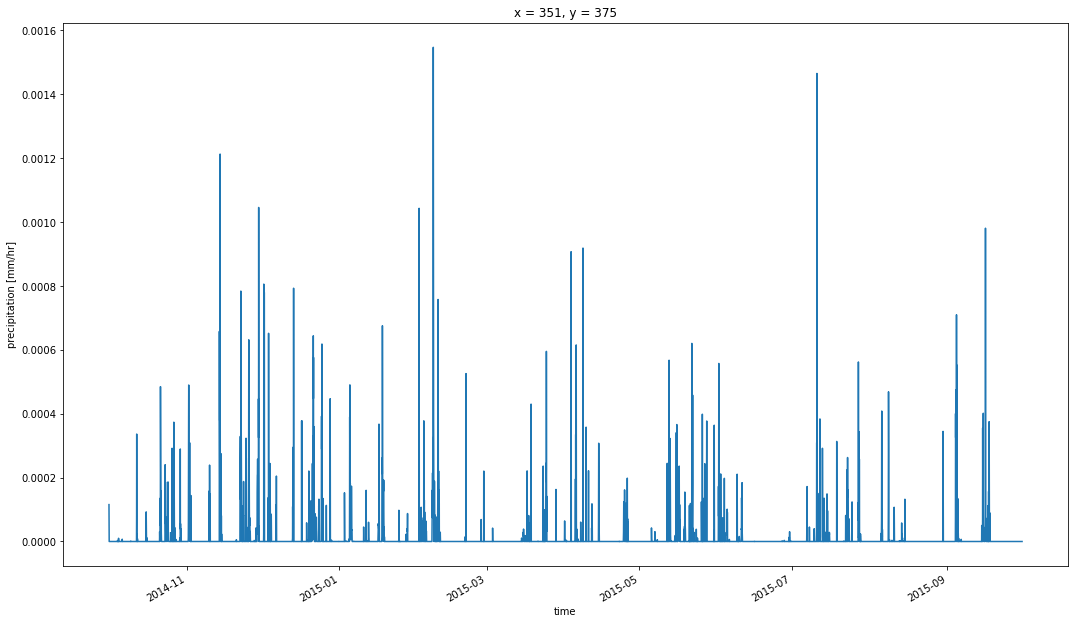

In [10]:
data[:,375,351].plot(figsize=(18,10))

In [11]:
%time data[:,375,351].mean(dim='time')

CPU times: user 1.06 ms, sys: 1.37 ms, total: 2.42 ms
Wall time: 1.88 ms


<xarray.DataArray ()>
array(1.40775221e-05)
Coordinates:
    x        int64 351
    y        int64 375

In [12]:
%time day_avg = data[:,375,351].groupby("time.dayofyear").mean(dim='time', keep_attrs=True)

CPU times: user 116 ms, sys: 7.06 ms, total: 123 ms
Wall time: 122 ms


In [ ]:
day_avg

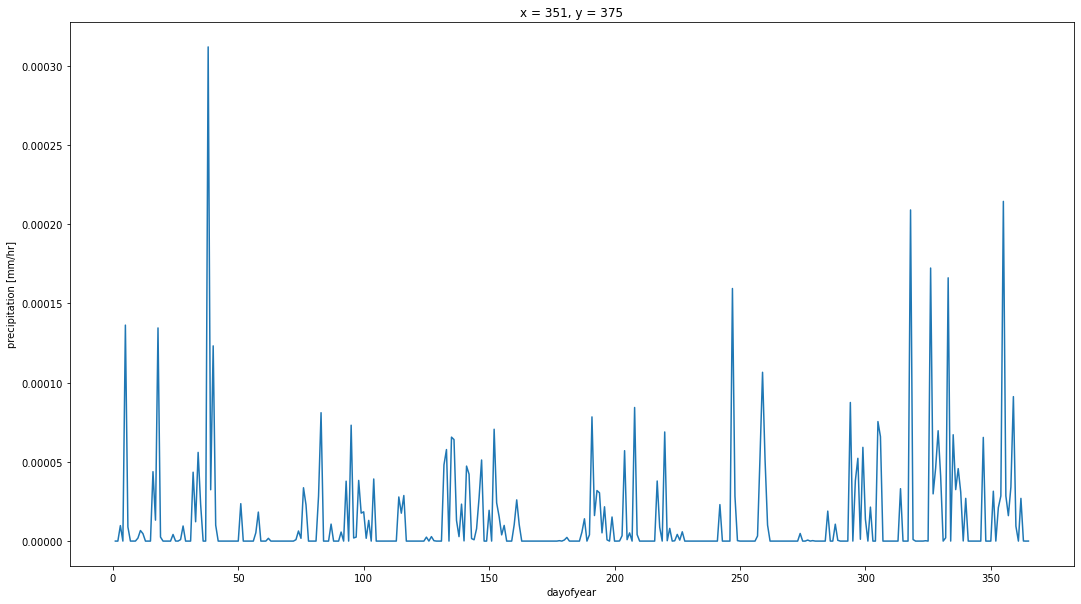

In [14]:
day_avg.plot(figsize=(18,10))

In [15]:
end_time = time.time()
end_time - start_time

216.40934300422668